# Graph Lab

## Header information:

  - Author #1: Wenyu Yin (yinw7@mcmaster.ca)
  - Author #2: Xiang Zhang (zhanx326@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/zhanx326/l1-graph-lab.git
  - Avenue to Learn group name: Group 30

In [1]:
# Load graph data in csv
from subway.utils.dataLoader import DataLoader

data_loader = DataLoader('_dataset/london.stations - Test.csv', '_dataset/london.lines - Test.csv', '_dataset/london.connections - Test.csv')
# data_loader = DataLoader('_dataset/london.stations.csv', '_dataset/london.lines.csv', '_dataset/london.connections.csv')

stations = data_loader.loadStation()
lines = data_loader.loadLine()
connections = data_loader.loadConnections(stations, lines)

In [2]:
# Compute the metrics
from subway.utils.metricsHandler import MetricsHandler

metrics_handler = MetricsHandler(stations, lines, connections)

print(f"Number of nodes: {metrics_handler.computeNodeNum()}")
print(f"Number of edges: {metrics_handler.computeEdgeNum()}")
print(f"Average degree of the nodes: {metrics_handler.computeAvgDeg():.2f}")

Number of nodes: 9
Number of edges: 20
Average degree of the nodes: 4.44


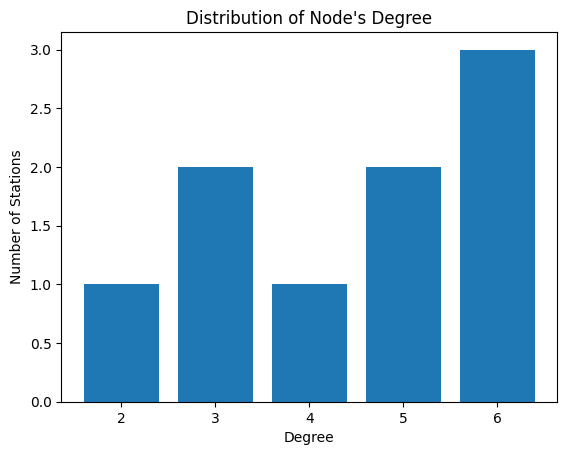

In [3]:
# Plot the distribution of node's degree
metrics_handler.plot()

In [4]:
from subway.shortestPath.adjList import AdjList
from subway.shortestPath.dijkstra import Dijkstra
from subway.shortestPath.aStar import Astar
from subway.shortestPath.pathGenerator import PathGenerator

adjList = AdjList(connections)
# start = stations[3]
# end = stations[7]
start = stations[3]
end = stations[7]

dijkstra_algo = Dijkstra(adjList, stations, start, end)
astar_algo = Astar(adjList, stations, start, end)
path_gen = PathGenerator()
# edgeTo, expanding_count = dijkstra_algo.findShortestPath()
edgeTo = astar_algo.findShortestPath()

print(edgeTo)

paths = path_gen.generatePath(edgeTo, start, end, connections)
print()
for path in paths:
    path.printItinerary()
    
print('\n')
path_gen.pickTopInitinerary().printItinerary()

# print(f'Ratio used/explored: {path_gen.countStations()/expanding_count}')

{<subway.structures.station.Station object at 0x0000017B332C2790>: [(<subway.structures.station.Station object at 0x0000017B332C26A0>, <subway.structures.line.Line object at 0x0000017B331F2B20>), (<subway.structures.station.Station object at 0x0000017B332C2040>, <subway.structures.line.Line object at 0x0000017B331F2B20>)], <subway.structures.station.Station object at 0x0000017B332C2A30>: [(<subway.structures.station.Station object at 0x0000017B332C26A0>, <subway.structures.line.Line object at 0x0000017B332C2910>)], <subway.structures.station.Station object at 0x0000017B332C26A0>: [(<subway.structures.station.Station object at 0x0000017B332C2190>, <subway.structures.line.Line object at 0x0000017B331F2CA0>)], <subway.structures.station.Station object at 0x0000017B332C2190>: [], <subway.structures.station.Station object at 0x0000017B332C2430>: [(<subway.structures.station.Station object at 0x0000017B332C2190>, <subway.structures.line.Line object at 0x0000017B331F2CA0>)], <subway.structure

In [5]:
# testing block
from subway.utils.randomGen import RandomGenerator

random_gen = RandomGenerator(100, 10, 0.1)
stations = random_gen.s_list
lines = random_gen.l_list
connections = random_gen.c_list

from subway.shortestPath.adjList import AdjList
from subway.shortestPath.dijkstra import Dijkstra
from subway.shortestPath.aStar import Astar
from subway.shortestPath.pathGenerator import PathGenerator

adjList = AdjList(connections)
# start = stations[3]
# end = stations[7]
start = stations[3]
end = stations[50]

dijkstra_algo = Dijkstra(adjList, stations, start, end)
astar_algo = Astar(adjList, stations, start, end)
path_gen = PathGenerator()
# edgeTo, expanding_count = dijkstra_algo.findShortestPath()
edgeTo, expanding_count = astar_algo.findShortestPath()

paths = path_gen.generatePath(edgeTo, start, end, connections)
print()
for path in paths:
    path.printItinerary()

print('\n')
path_gen.pickTopInitinerary().printItinerary()

print(f'Ratio used/explored: {path_gen.countStations()/expanding_count}')

ValueError: too many values to unpack (expected 2)

## KPIs to measure
We want something that can be quantified to measure the performance of Dijkstra and A* algorithms
1. Execution time
2. Number of unused stations explored
3. Growth of execution time with respect to growth of distance from start station to end station (somewhat similar to number of stations)
4. Ratio of acceptable result and total number of results generated



![UML Diagram](lab1_UML.png)

## Design Choices